<a href="https://colab.research.google.com/github/eiman-ops/MNIST-MIX/blob/main/MNIST_MIX_GUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quiet gradio

     |████████████████████████████████| 1.1MB 8.8MB/s 
     |████████████████████████████████| 215kB 24.7MB/s 
     |████████████████████████████████| 962kB 27.0MB/s 
     |████████████████████████████████| 2.6MB 38.8MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.0MB/s 
     |████████████████████████████████| 1.1MB 11.9MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 194kB 28.7MB/s 
     |████████████████████████████████| 61kB 11.0MB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *
from fastbook import *

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root_dir = 'gdrive/My Drive/UnpackAi2/MNIST-MIX/'
base_dir = root_dir + 'MNIST-MIX'

Mounted at /content/drive


In [ ]:
path = Path('/content/drive/My Drive/UnpackAi2/MNIST-MIX/training/')
path.ls()

(#11) [Path('/content/drive/My Drive/UnpackAi2/MNIST-MIX/training/Digit 1'),Path('/content/drive/My Drive/UnpackAi2/MNIST-MIX/training/Digit 9'),Path('/content/drive/My Drive/UnpackAi2/MNIST-MIX/training/Digit 6'),Path('/content/drive/My Drive/UnpackAi2/MNIST-MIX/training/Digit 8'),Path('/content/drive/My Drive/UnpackAi2/MNIST-MIX/training/Digit 2'),Path('/content/drive/My Drive/UnpackAi2/MNIST-MIX/training/Digit 4'),Path('/content/drive/My Drive/UnpackAi2/MNIST-MIX/training/Digit 5'),Path('/content/drive/My Drive/UnpackAi2/MNIST-MIX/training/Digit 3'),Path('/content/drive/My Drive/UnpackAi2/MNIST-MIX/training/Digit 7'),Path('/content/drive/My Drive/UnpackAi2/MNIST-MIX/training/Digit 0')...]

In [ ]:
files = get_image_files(path)
len(files)

60019

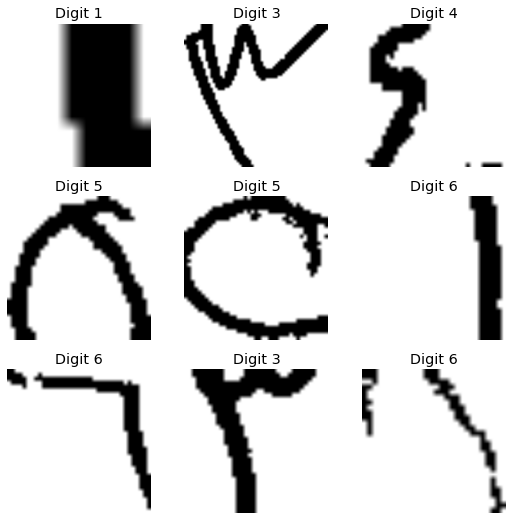

In [ ]:
fnames = get_image_files(path)
def label_func(f): return f.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames,
  label_func, valid_pct=0.2, seed=42, item_tfms=Resize(224) )
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(9)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.214632,0.099059,0.030492,2:12:29


epoch,train_loss,valid_loss,error_rate,time
0,0.130549,0.056976,0.018245,07:02
1,0.124678,0.065782,0.020245,07:02
2,0.098337,0.056617,0.017079,07:02
3,0.081578,0.050717,0.018079,06:55
4,0.062060,0.044029,0.014330,06:52
5,0.065854,0.047297,0.015496,06:51
6,0.052504,0.041011,0.014413,06:51
7,0.045302,0.043837,0.015413,06:51
8,0.040227,0.040287,0.013663,06:52


In [ ]:
learn.predict(files[150])

('Digit 1',
 tensor(1),
 tensor([1.6637e-03, 9.9831e-01, 4.5068e-06, 8.3850e-06, 1.6531e-06, 7.2817e-07, 3.7302e-06, 2.3100e-07, 4.8441e-07, 7.4156e-06]))

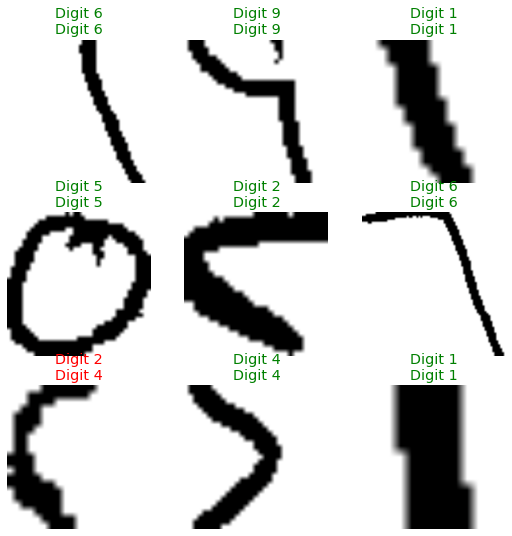

In [ ]:
learn.show_results()

In [ ]:
import gradio as gr

In [ ]:
def recognize_digit(image):
    image = image.reshape(9, -1)  # add a batch dimension
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

output_component = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=recognize_digit, 
             inputs="sketchpad", 
             outputs=output_component,live=True).launch();

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
This share link will expire in 24 hours. If you need a permanent link, email support@gradio.app
Running on External URL: https://32662.gradio.app
Interface loading below...


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [ ]:
learn.lr_find()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()

In [ ]:
from google.colab import files
files.download(path/'export.pkl')